# Prob plot

In [1]:
# imports
from ulmo.models import io as mod_io
import h5py
import pandas as pd
import numpy as np

# Load model (from s3)

In [2]:
pae_ssh = mod_io.load_ssh()

Using device=cuda
Loading autoencoder model from: s3://ssh/Models/SSH_std/autoencoder.pt
Loading flow model from: s3://ssh/Models/SSH_std/flow.pt
scaler loaded from: s3://ssh/Models/SSH_std/SSH_100clear_32x32_train_scaler.pkl


## Files

In [3]:
pae_ssh.filepath

{'data': 'PreProc/SSH_100clear_32x32_train.h5',
 'latents': 's3://ssh/Models/SSH_std/SSH_100clear_32x32_train_latents.h5',
 'log_probs': 's3://ssh/Models/SSH_std/SSH_100clear_32x32_train_log_probs.h5',
 'flow_latents': 's3://ssh/Models/SSH_std/SSH_100clear_32x32_train_flow_latents.h5'}

# Latents exist

In [4]:
pae_ssh.up_to_date_latents = True

## Set files to local

In [5]:
pae_ssh.filepath['latents'] = 'SSH_std/SSH_100clear_32x32_train_latents.h5'
pae_ssh.filepath['log_probs'] = 'SSH_std/SSH_100clear_32x32_train_log_probs.h5'

# Plot me!

## Probs now exist..

In [6]:
pae_ssh.up_to_date_log_probs = True

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


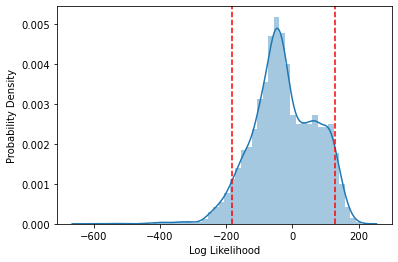

In [9]:
pae_ssh.plot_log_probs(save_figure=True, logdir='SSH_std')

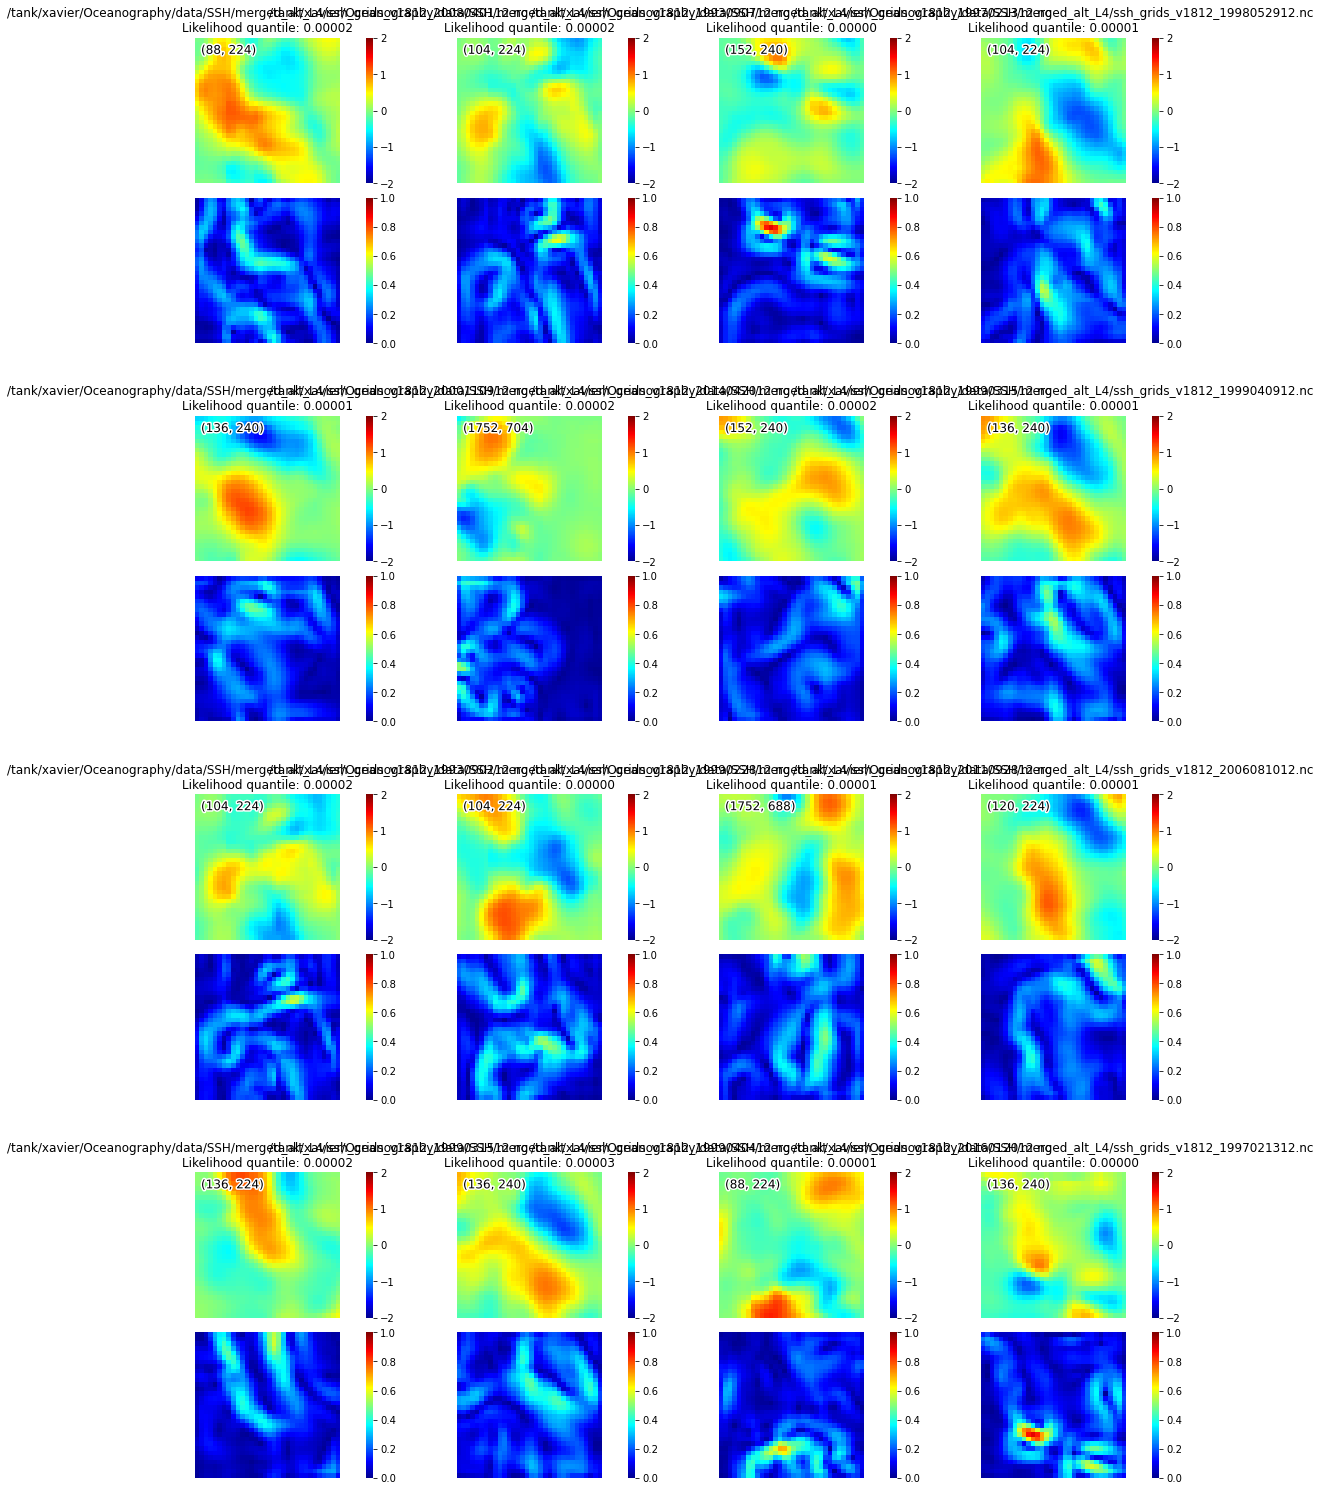

In [10]:
pae_ssh.plot_grid('least likely')

----

# Testing

In [10]:
pae_ssh.filepath

{'data': 'PreProc/SSH_100clear_32x32_train.h5',
 'latents': 'SSH_std/SSH_100clear_32x32_train_latents.h5',
 'log_probs': 'SSH_std/SSH_100clear_32x32_train_log_probs.h5',
 'flow_latents': 's3://ssh/Models/SSH_std/SSH_100clear_32x32_train_flow_latents.h5'}

## Meta

In [13]:
f = h5py.File(pae_ssh.filepath['data'], 'r')

array(['filename', 'row', 'col', 'lat', 'lon', 'clear_fraction',
       'field_size', 'datetime', 'ex_filename', 'pp_file', 'pp_root',
       'pp_idx', 'pp_type', 'mean_temperature', 'Tmin', 'Tmax', 'T90',
       'T10'], dtype=object)

In [17]:
meta = f['valid_metadata']
 

ValueError: DataFrame constructor not properly called!

In [24]:
tmp = meta[:].astype(np.unicode_)
type(tmp)

numpy.ndarray

In [25]:
df = pd.DataFrame(meta[:].astype(np.unicode_), columns=meta.attrs['columns'])

In [26]:
df.iloc[0]

filename            /tank/xavier/Oceanography/data/SSH/merged_alt_...
row                                                              2008
col                                                               464
lat                                                       0.083333336
lon                                                         337.41666
clear_fraction                                                    0.0
field_size                                                         32
datetime                                          2003-11-19 12:00:00
ex_filename                s3://ssh/Extractions/SSH_100clear_32x32.h5
pp_file                        s3://ssh/PreProc/SSH_100clear_32x32.h5
pp_root                                                       ssh_std
pp_idx                                                             29
pp_type                                                             0
mean_temperature                                    0.032730583101511
Tmin                